In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [3]:

datapath = 'CK+48'

emolab = {
    'anger': 0,
    'contempt': 1,
    'disgust': 2,
    'fear': 3,
    'happy': 4,
    'sadness': 5,
    'surprise': 6
}

def preprocess_data(datapath, emolab, image_size=(64, 64)):
    images = []
    labels = []

    for emotion, label in emolab.items():
        emodirectory = os.path.join(datapath, emotion)
        
        if not os.path.exists(emodirectory):
            continue
        
        for img_file in os.listdir(emodirectory):
            if img_file.endswith('.png'):
                img_path = os.path.join(emodirectory, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, image_size)
                img = img.astype('float32') / 255.0
                
                images.append(img)
                labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    images = images.reshape(-1, image_size[0], image_size[1], 1)

    labels = to_categorical(labels, num_classes=len(emolab))

    return images, labels

X, y = preprocess_data(datapath, emolab)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 784, Testing samples: 197


In [ ]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((3, 3)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')])
    return model

input_shape = (64, 64, 1)  
num_classes = 7  

model = create_model(input_shape, num_classes)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 534,983 (2.04 MB)

 Trainable params: 534,983 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

: 

In [5]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    epochs=20
)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.8623 - loss: 0.3640 - val_accuracy: 0.9137 - val_loss: 0.2953
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.8665 - loss: 0.3535 - val_accuracy: 0.9086 - val_loss: 0.2695
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.8770 - loss: 0.3246 - val_accuracy: 0.9391 - val_loss: 0.2258
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.8940 - loss: 0.2983 - val_accuracy: 0.9289 - val_loss: 0.2557
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.8867 - loss: 0.3140 - val_accuracy: 0.9340 - val_loss: 0.2135
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.8930 - loss: 0.2727 - val_accuracy: 0.9492 - val_loss: 0.1792
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.9025 - loss: 0.2536 - val_accuracy: 0.8985 - val_loss: 0.2324
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.8949 - loss: 0.3153 - val_accuracy: 0.9594 - v

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9758 - loss: 0.1062
Test Loss: 0.09469, Test Accuracy: 97.96954%


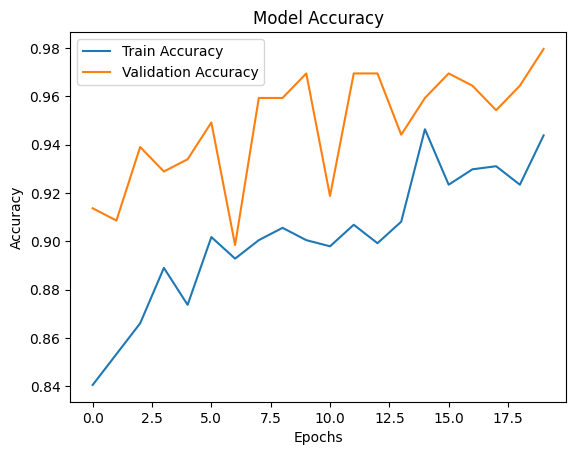

In [5]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.5f}, Test Accuracy: {accuracy*100:.5f}%")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()


In [9]:

emolab = {0: 'Angry', 1: 'Contempt', 2: 'Disgusted',3: 'Fear', 4 : 'Happy',5 : 'Sad', 6: 'Surprised'}

def preprocess_image_for_prediction(image, image_size=(64, 64)):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, image_size)
    normalized = resized.astype('float32') / 255.0
    reshaped = normalized.reshape(1, image_size[0], image_size[1], 1)
    return reshaped

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame.")
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=7, minSize=(40, 40))

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        face = frame[y:y+h, x:x+w]
        input_image = preprocess_image_for_prediction(face)
        predictions = model.predict(input_image)  
        classprediction = np.argmax(predictions)
        emoprediction = emolab[classprediction]

        cv2.putText(frame, emoprediction, (x, y - 10), cv2.FONT_HERSHEY_COMPLEX, 0.9, (255, 255, 255), 2)
    cv2.imshow("Emotion Detection", frame)
    if cv2.waitKey(1) &0xFF ==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

2025-06-10 12:51:04.915 Python[9327:4845787] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/dt/_kd6szqs4gxct6stfgskt30m0000gn/T/org.python.python.savedState


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

In [7]:
print(classification_report(predic, X_test))

NameError: name 'classification_report' is not defined